In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.style.use('seaborn-white')

/var/folders/t_/qkyt0t8j0tb_tk3l4p471xpc0000gn/T/ipykernel_46931/1034667186.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [6]:
# import data
data_raw = pd.read_csv('data_train-2.csv')
data_raw.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,109,331,116,5,5.0,5.0,9.38,1,0.93
1,1,346,316,98,1,1.5,2.0,7.43,0,0.49
2,2,99,332,119,4,5.0,4.5,9.24,1,0.90
3,3,210,301,104,3,3.5,4.0,8.12,1,0.68
4,4,242,317,103,2,2.5,2.0,8.15,0,0.65


In [7]:
# cleaning data column names

data_raw.rename(columns = {'Chance of Admit ' : 'Chance of Admit', "LOR ": "LOR"}, inplace = True)
#['Chance of Admit'].median()

In [8]:
# Get median and change the label into binary

chance_median = data_raw['Chance of Admit'].median()
data_raw['Chance of Admit'] = data_raw["Chance of Admit"].apply(lambda x: 1 if x > chance_median else 0)
data_raw.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,109,331,116,5,5.0,5.0,9.38,1,1
1,1,346,316,98,1,1.5,2.0,7.43,0,0
2,2,99,332,119,4,5.0,4.5,9.24,1,1
3,3,210,301,104,3,3.5,4.0,8.12,1,0
4,4,242,317,103,2,2.5,2.0,8.15,0,0


In [9]:
# Split into X and y
data = data_raw
X = data[["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR", "CGPA", "Research"]]
y = data["Chance of Admit"]
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,331,116,5,5.0,5.0,9.38,1
1,316,98,1,1.5,2.0,7.43,0
2,332,119,4,5.0,4.5,9.24,1
3,301,104,3,3.5,4.0,8.12,1
4,317,103,2,2.5,2.0,8.15,0
...,...,...,...,...,...,...,...
315,337,118,4,4.5,4.5,9.65,1
316,304,101,2,2.0,2.5,7.66,0
317,299,100,3,2.0,2.0,8.02,0
318,303,98,1,2.0,2.5,7.65,0


In [10]:
# Standarize data

def standardize_dataframe(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    standardized_df = pd.DataFrame(scaled_data, columns=df.columns)
    return standardized_df

# Assuming df is your DataFrame
X = standardize_dataframe(X)

In [11]:
# split into train and test

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 11)

In [12]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
296,-1.153992,-0.840735,-0.039871,0.120913,-0.465535,-0.134500,-1.098588
143,-0.641225,-0.516205,-0.890457,-1.330040,-1.013223,-0.529512,-1.098588
169,0.298847,-0.516205,-0.039871,-0.362738,0.082153,0.260513,0.910259
238,0.127925,-1.165265,-0.890457,-0.846389,0.082153,-0.068664,0.910259
25,-0.128459,-0.353940,-0.890457,-1.330040,-1.013223,-1.533502,-1.098588
...,...,...,...,...,...,...,...
161,0.127925,0.295119,-1.741043,0.120913,0.082153,0.885949,-1.098588
269,-1.324914,-1.327530,-0.890457,-0.362738,-1.560912,-0.595347,-1.098588
91,0.640691,0.619649,-0.039871,-0.846389,-2.108600,0.342807,0.910259
80,-1.495837,-1.165265,-1.741043,-1.813691,-1.560912,-1.138489,-1.098588


In [13]:
# Initialize SVM models using 1. Linear 2. RBF 3. Polynomial (degree 3) kernels
# Just initalizing the models here with random value of 'C'- will perform hyper parameter tuning while training

svc_linear = SVC(C=0.1, kernel='linear')
svc_rbf = SVC(C=0.1, kernel='rbf')
svc_poly3 = SVC(C=0.1, kernel='poly', degree = 3)
svc_poly5 = SVC(C=0.1, kernel='poly', degree = 5)

In [14]:
# split data into different X feature sets
X1_train = x_train[['CGPA', 'SOP']]
X2_train = x_train[['CGPA', 'GRE Score']]
X3_train = x_train[['SOP', 'LOR']]
X4_train = x_train[['LOR', 'GRE Score']]

X1_train.reset_index(drop=True, inplace=True)
X2_train.reset_index(drop=True, inplace=True)
X3_train.reset_index(drop=True, inplace=True)
X4_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X1_val = x_train[['CGPA', 'SOP']]
X2_val = x_train[['CGPA', 'GRE Score']]
X3_val = x_train[['SOP', 'LOR']]
X4_val = x_train[['LOR', 'GRE Score']]

X1_val.reset_index(drop=True, inplace=True)
X2_val.reset_index(drop=True, inplace=True)
X3_val.reset_index(drop=True, inplace=True)
X4_val.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [15]:
X1_train.head()

,CGPA,SOP
0,-0.134500,0.120913
1,-0.529512,-1.330040
2,0.260513,-0.362738
3,-0.068664,-0.846389
4,-1.533502,-1.330040


In [16]:
X1_train.columns

Index(['CGPA', 'SOP'], dtype='object')

In [17]:
# hyper parameter tuning and getting themodels for each kernel and selected hyper parameter
# save the model and correspodning features

tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]

svc_models = {
    'linear': SVC(kernel='linear'),
    'rbf': SVC(kernel='rbf'),
    'poly': SVC(kernel='poly', degree=3),
    'sigmoid': SVC(kernel='sigmoid')
}


X_trains = [X1_train, X2_train, X3_train, X4_train]
X_vals = [X1_val, X2_val, X3_val, X4_val]

trained_classifiers = {}
feature_names = {}
accuracy= {}

for (X_train_index, X_train), (X_val_index, X_val) in zip(enumerate(X_trains, start=1), enumerate(X_vals, start=1)):
    print("Processing X_train{} and X_val{}".format(X_train_index, X_val_index))
    
   
    best_C_values = {}
    for kernel_name, svc_model in svc_models.items():
        clf = GridSearchCV(svc_model, tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
        clf.fit(X_train, y_train)
        best_C_values[kernel_name] = clf.best_params_['C']
        print("Best C for {} kernel with X_train{} is: {}".format(kernel_name, X_train_index, clf.best_params_['C']))
        
        best_C = clf.best_params_['C']        
       
        best_svc_model = SVC(kernel=kernel_name, C=best_C)
        best_svc_model.fit(X_train, y_train)

        # make predictions
        y_pred = best_svc_model.predict(X_val)        
       
        classifier_name = "svm_{}_X_train{}".format(kernel_name, X_train_index)
        
        trained_classifiers[classifier_name] = best_svc_model
        feature_names[classifier_name] = X_train.columns.tolist()
        
        accuracy[classifier_name] = accuracy_score(y_train, y_pred)
        
        print("Trained SVM classifier {} with best C value ({}) for kernel {}.".format(classifier_name, best_C, kernel_name))
    print("\n")

Processing X_train1 and X_val1
Best C for linear kernel with X_train1 is: 0.1
Trained SVM classifier svm_linear_X_train1 with best C value (0.1) for kernel linear.
Best C for rbf kernel with X_train1 is: 5
Trained SVM classifier svm_rbf_X_train1 with best C value (5) for kernel rbf.
Best C for poly kernel with X_train1 is: 10
Trained SVM classifier svm_poly_X_train1 with best C value (10) for kernel poly.
Best C for sigmoid kernel with X_train1 is: 0.1
Trained SVM classifier svm_sigmoid_X_train1 with best C value (0.1) for kernel sigmoid.


Processing X_train2 and X_val2
Best C for linear kernel with X_train2 is: 5
Trained SVM classifier svm_linear_X_train2 with best C value (5) for kernel linear.
Best C for rbf kernel with X_train2 is: 5
Trained SVM classifier svm_rbf_X_train2 with best C value (5) for kernel rbf.
Best C for poly kernel with X_train2 is: 0.1
Trained SVM classifier svm_poly_X_train2 with best C value (0.1) for kernel poly.
Best C for sigmoid kernel with X_train2 is: 0.

In [18]:
# Best performance : Linear with X1 as feature dataset ie: CGPA and SOP

In [19]:
# print suppport vecotrs
support_vectors_info = {}

for classifier_name, trained_classifier in trained_classifiers.items():

    support_vectors = trained_classifier.support_vectors_
    support_vectors_indices = trained_classifier.support_

    support_vectors_labels = y_train[support_vectors_indices]

    class_counts = {}
    for label in set(support_vectors_labels):
        class_counts[label] = np.sum(support_vectors_labels == label)

    support_vectors_info[classifier_name] = {
        'support_vectors': support_vectors,
        'class_counts': class_counts
    }

for classifier_name, info in support_vectors_info.items():
    print("Support vectors for {}: {}".format(classifier_name, info['support_vectors']))
    print("Number of support vectors for each class:", info['class_counts'])


Support vectors for svm_linear_X_train1: [[-0.13449963  0.12091271]
 [-0.06866425 -0.84638896]
 [ 0.24405383 -0.36273813]
 [-0.21679386  0.12091271]
 [-0.24971155 -0.84638896]
 [-0.08512309  0.12091271]
 [ 0.29343036 -0.84638896]
 [-0.75993578  0.12091271]
 [ 0.68844267 -0.84638896]
 [-0.08512309  0.12091271]
 [-0.72701809  1.08821438]
 [-0.79285347  0.60456354]
 [-0.18387617  1.08821438]
 [-0.46367655  0.12091271]
 [-0.03574656 -1.33003979]
 [-0.95744193  0.60456354]
 [-0.36492348 -0.84638896]
 [-0.2661704  -0.84638896]
 [-0.21679386 -0.36273813]
 [ 0.75427805  1.08821438]
 [ 0.29343036  0.12091271]
 [ 0.11238306 -1.33003979]
 [ 0.09592421  1.57186521]
 [-0.62826501  0.60456354]
 [-0.13449963  0.60456354]
 [ 0.17821844  0.60456354]
 [ 0.06300652 -0.84638896]
 [ 0.32634806  0.60456354]
 [-0.20033502  0.12091271]
 [ 0.3428069  -0.36273813]
 [-0.67764155  0.12091271]
 [-0.03574656  0.12091271]
 [ 0.1617596  -0.84638896]
 [-0.54597078  0.60456354]
 [-0.9080654   0.60456354]
 [-0.03574656 

In [20]:
trained_classifiers

{'svm_linear_X_train1': SVC(C=0.1, kernel='linear'),
 'svm_rbf_X_train1': SVC(C=5),
 'svm_poly_X_train1': SVC(C=10, kernel='poly'),
 'svm_sigmoid_X_train1': SVC(C=0.1, kernel='sigmoid'),
 'svm_linear_X_train2': SVC(C=5, kernel='linear'),
 'svm_rbf_X_train2': SVC(C=5),
 'svm_poly_X_train2': SVC(C=0.1, kernel='poly'),
 'svm_sigmoid_X_train2': SVC(C=0.01, kernel='sigmoid'),
 'svm_linear_X_train3': SVC(C=0.01, kernel='linear'),
 'svm_rbf_X_train3': SVC(C=0.1),
 'svm_poly_X_train3': SVC(C=0.01, kernel='poly'),
 'svm_sigmoid_X_train3': SVC(C=0.01, kernel='sigmoid'),
 'svm_linear_X_train4': SVC(C=0.1, kernel='linear'),
 'svm_rbf_X_train4': SVC(C=1),
 'svm_poly_X_train4': SVC(C=0.1, kernel='poly'),
 'svm_sigmoid_X_train4': SVC(C=0.1, kernel='sigmoid')}

In [21]:
accuracy
# best accuracy is for Linear kernel SVM for training data features 1 ie SOP and CGPA
# accuracy is 86.71 %

{'svm_linear_X_train1': 0.8671875,
 'svm_rbf_X_train1': 0.859375,
 'svm_poly_X_train1': 0.84375,
 'svm_sigmoid_X_train1': 0.86328125,
 'svm_linear_X_train2': 0.83984375,
 'svm_rbf_X_train2': 0.86328125,
 'svm_poly_X_train2': 0.84375,
 'svm_sigmoid_X_train2': 0.83984375,
 'svm_linear_X_train3': 0.77734375,
 'svm_rbf_X_train3': 0.78125,
 'svm_poly_X_train3': 0.7734375,
 'svm_sigmoid_X_train3': 0.77734375,
 'svm_linear_X_train4': 0.84765625,
 'svm_rbf_X_train4': 0.8515625,
 'svm_poly_X_train4': 0.8359375,
 'svm_sigmoid_X_train4': 0.84765625}

In [22]:
feature_names

{'svm_linear_X_train1': ['CGPA', 'SOP'],
 'svm_rbf_X_train1': ['CGPA', 'SOP'],
 'svm_poly_X_train1': ['CGPA', 'SOP'],
 'svm_sigmoid_X_train1': ['CGPA', 'SOP'],
 'svm_linear_X_train2': ['CGPA', 'GRE Score'],
 'svm_rbf_X_train2': ['CGPA', 'GRE Score'],
 'svm_poly_X_train2': ['CGPA', 'GRE Score'],
 'svm_sigmoid_X_train2': ['CGPA', 'GRE Score'],
 'svm_linear_X_train3': ['SOP', 'LOR'],
 'svm_rbf_X_train3': ['SOP', 'LOR'],
 'svm_poly_X_train3': ['SOP', 'LOR'],
 'svm_sigmoid_X_train3': ['SOP', 'LOR'],
 'svm_linear_X_train4': ['LOR', 'GRE Score'],
 'svm_rbf_X_train4': ['LOR', 'GRE Score'],
 'svm_poly_X_train4': ['LOR', 'GRE Score'],
 'svm_sigmoid_X_train4': ['LOR', 'GRE Score']}

In [23]:
# Plotting SVM
def plot_svc(svc, X, y, feature_names=None, h=0.01, pad=0.5):
    if feature_names is None:
        feature_names = ['X1', 'X2']  # Default feature names if not provided
    
    x_min, x_max = X.iloc[:, 0].min() - pad, X.iloc[:, 0].max() + pad
    y_min, y_max = X.iloc[:, 1].min() - pad, X.iloc[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))  # Adjust figure size
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)  # Use faint colors
    
    # Define markers for different classes
    markers = ['^', 's']
    class_labels = ['No Admission', 'Admission']
    unique_classes = np.unique(y)
    
    
    for i, marker in enumerate(markers):
        if i == 0:
            plt.scatter(X[y==unique_classes[i]].iloc[:, 0], X[y==unique_classes[i]].iloc[:, 1], s=50, marker=marker, label=class_labels[i], color='skyblue', edgecolor='black')
        else:
            plt.scatter(X[y==unique_classes[i]].iloc[:, 0], X[y==unique_classes[i]].iloc[:, 1], s=50, marker=marker, label=class_labels[i], color='orange', edgecolor='black')
    
    # Support vectors indicated in plot by markers
    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='yellow', marker='o', s=100, linewidths=1, edgecolors='black', label='Support Vectors')  # Set support vectors color as yellow
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(feature_names[0], fontsize=14)  
    plt.ylabel(feature_names[1], fontsize=14)  
    plt.xticks(fontsize=12)  
    plt.yticks(fontsize=12)  
    plt.title('SVM Decision Boundary', fontsize=16) 
    plt.legend() 
    plt.grid(True, linestyle='--', alpha=0.5) 
    plt.show()
    print('Number of support vectors: ', svc.support_.size)


Plotting for classifier: svm_linear_X_train1


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


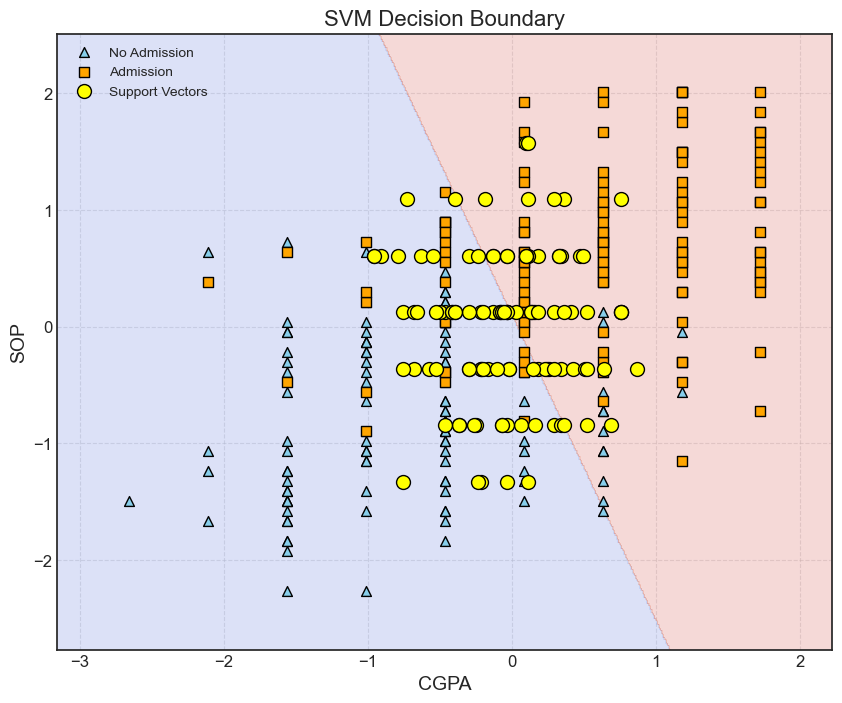

Number of support vectors:  109
Plotting for classifier: svm_rbf_X_train1


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


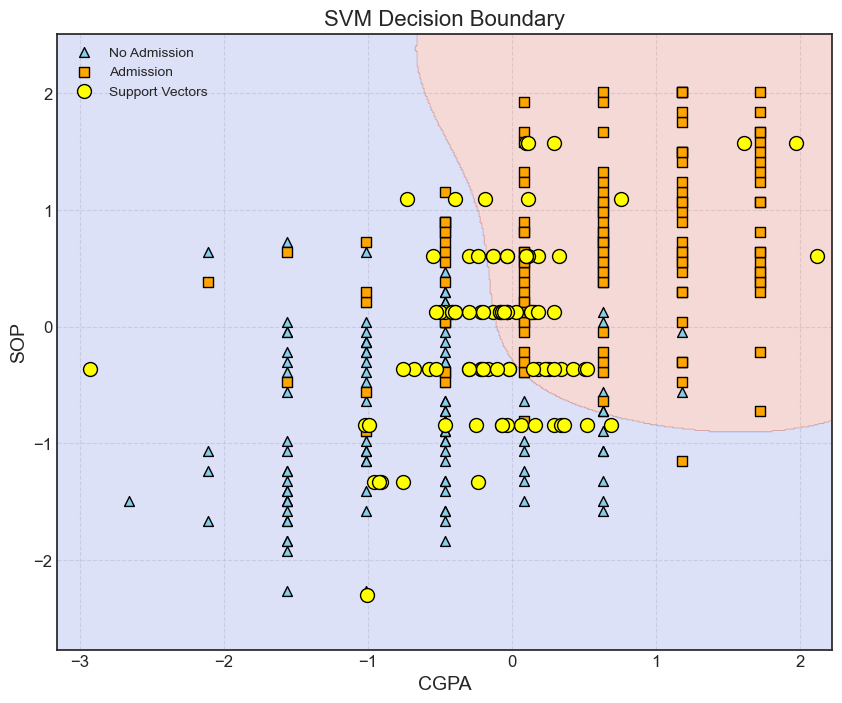

Number of support vectors:  92
Plotting for classifier: svm_poly_X_train1


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


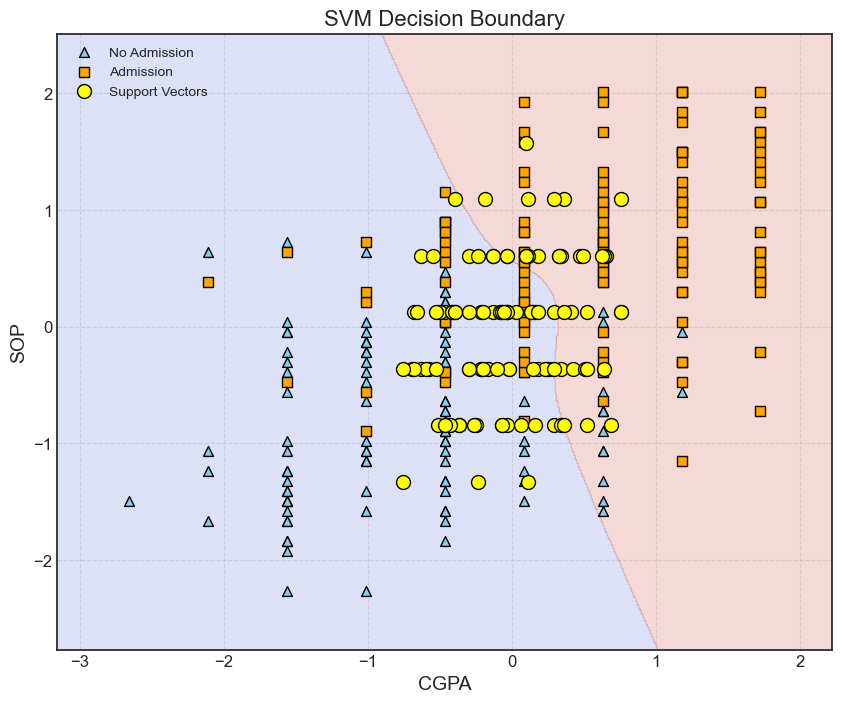

Number of support vectors:  107
Plotting for classifier: svm_sigmoid_X_train1


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


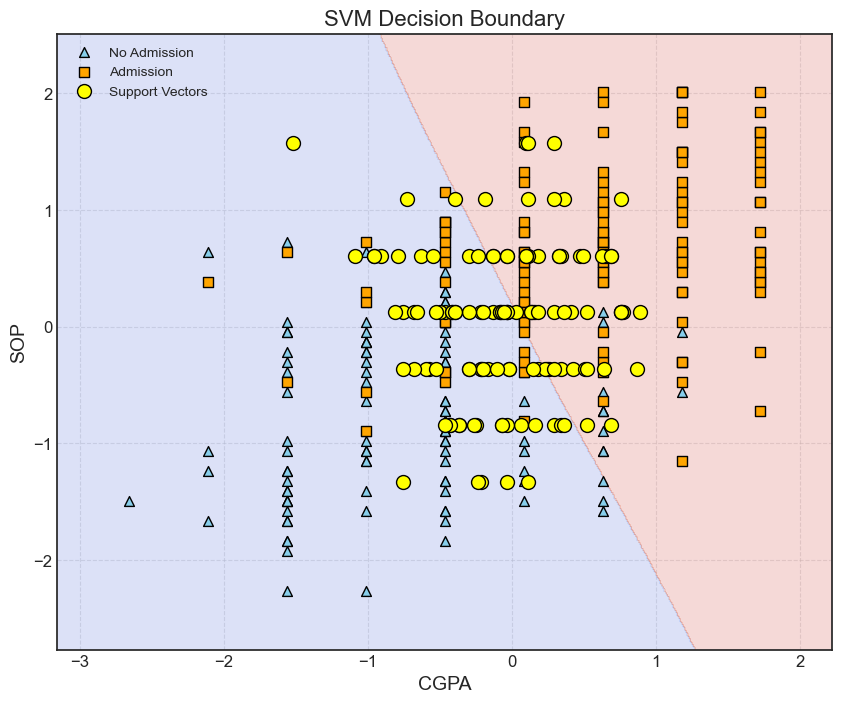

Number of support vectors:  123
Plotting for classifier: svm_linear_X_train2


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


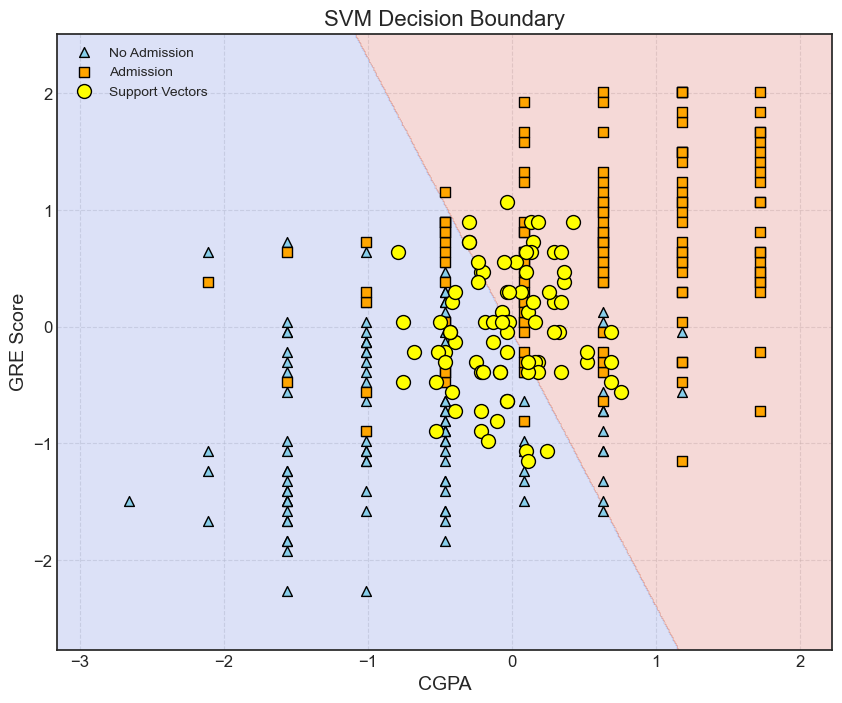

Number of support vectors:  84
Plotting for classifier: svm_rbf_X_train2


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


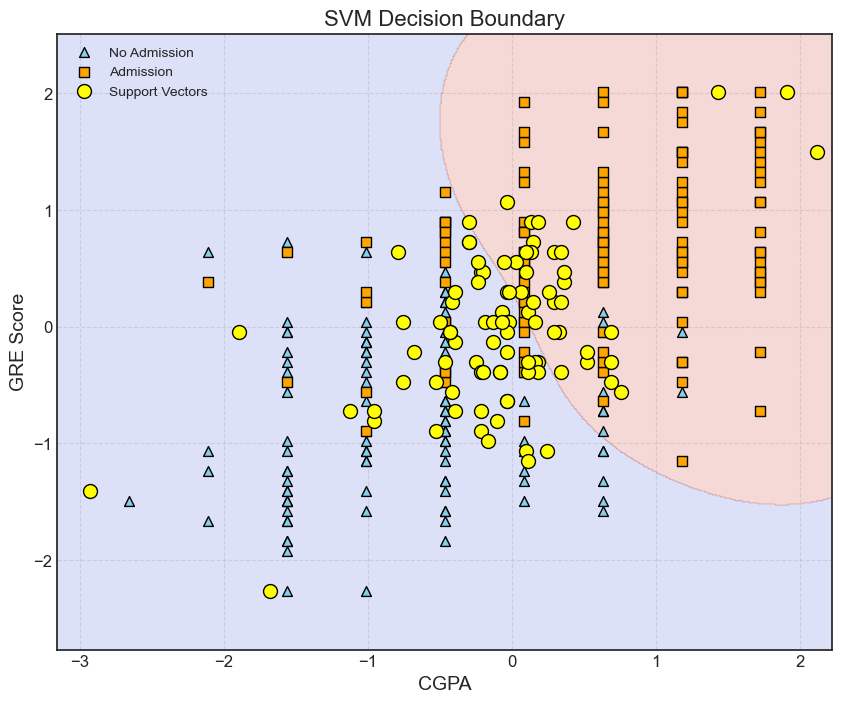

Number of support vectors:  91
Plotting for classifier: svm_poly_X_train2


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


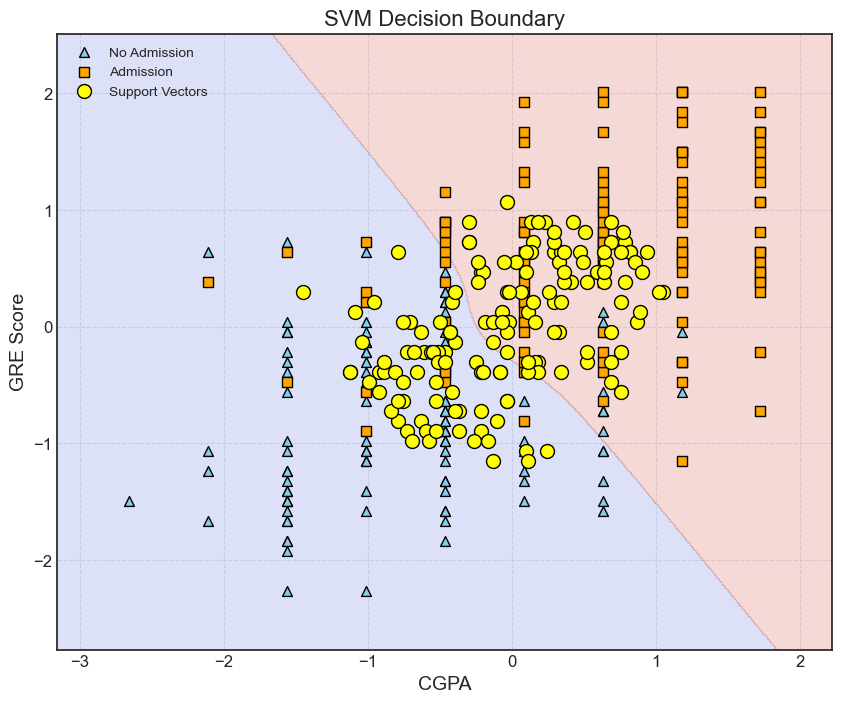

Number of support vectors:  151
Plotting for classifier: svm_sigmoid_X_train2


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


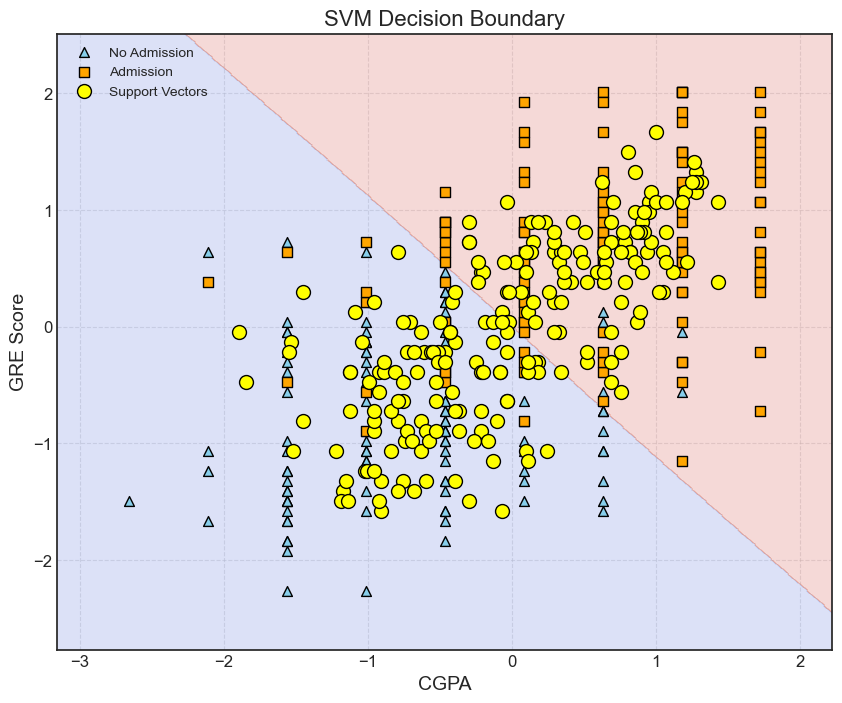

Number of support vectors:  214
Plotting for classifier: svm_linear_X_train3


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


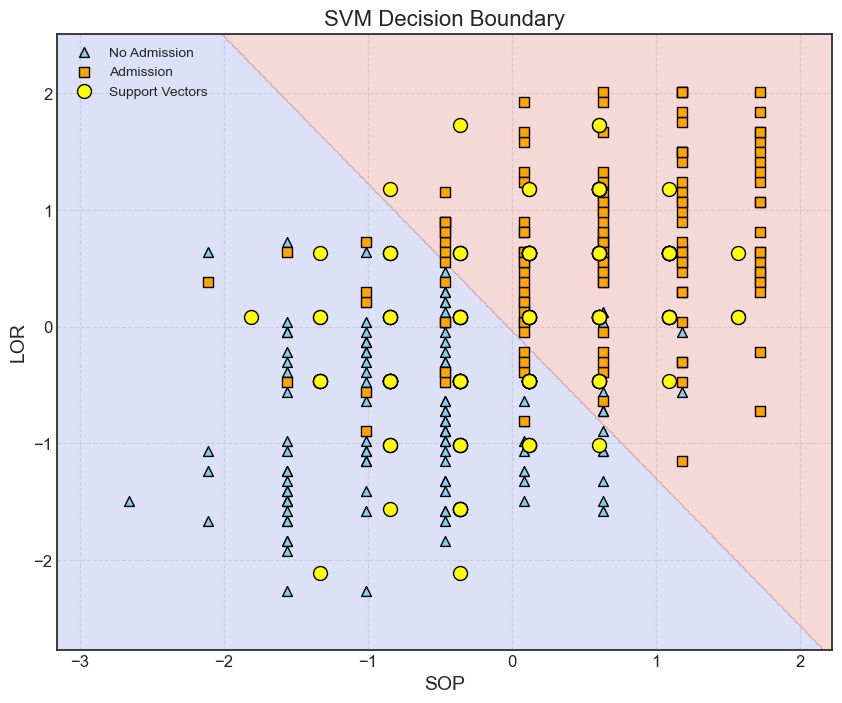

Number of support vectors:  180
Plotting for classifier: svm_rbf_X_train3


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


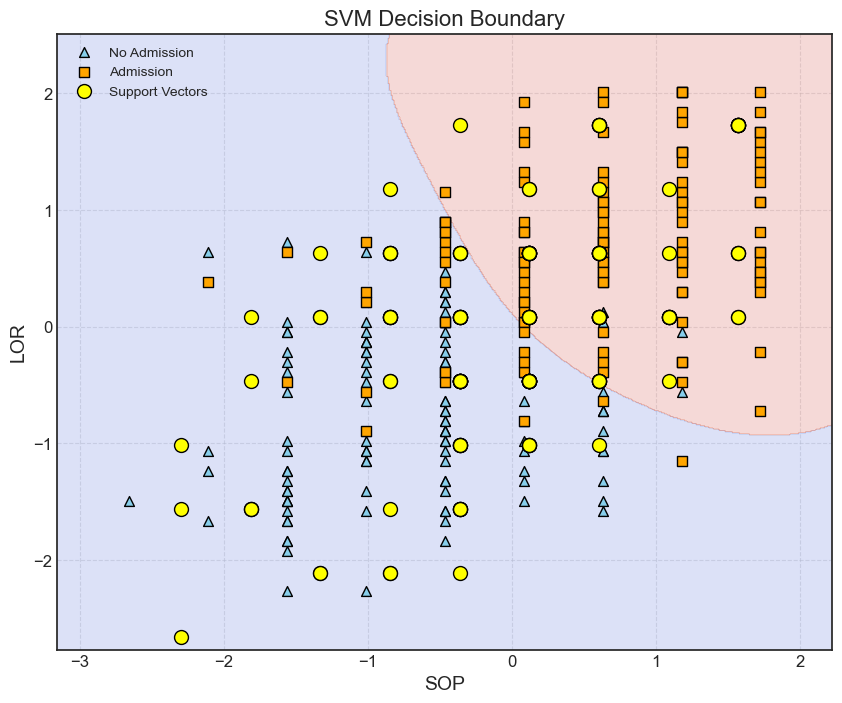

Number of support vectors:  161
Plotting for classifier: svm_poly_X_train3


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


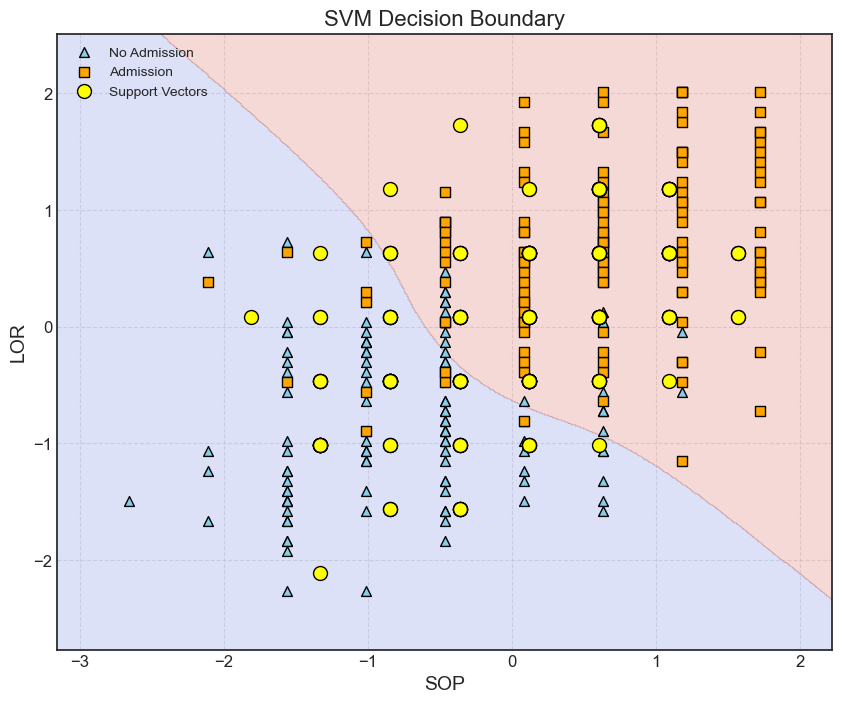

Number of support vectors:  204
Plotting for classifier: svm_sigmoid_X_train3


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


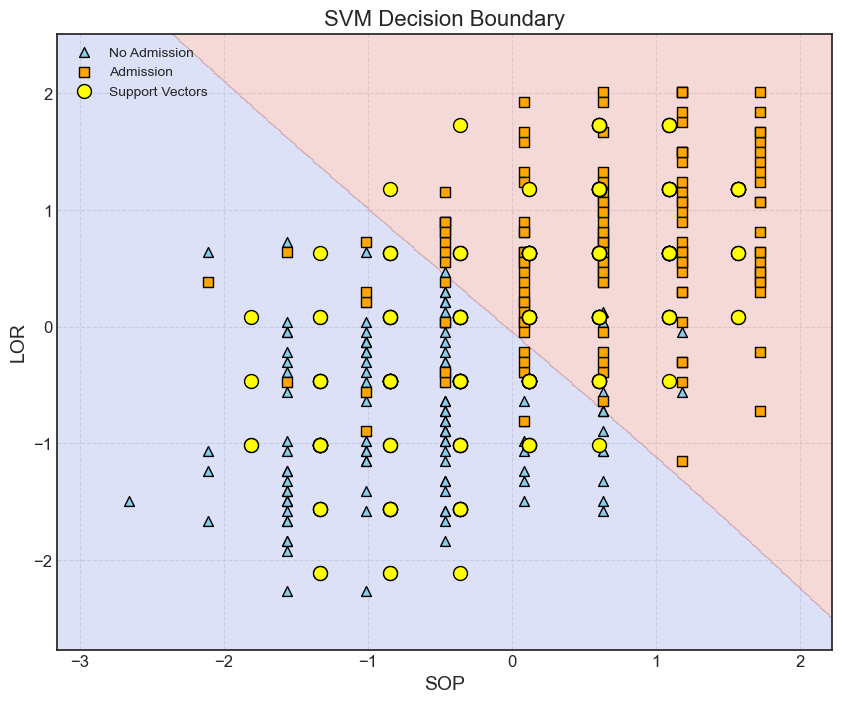

Number of support vectors:  232
Plotting for classifier: svm_linear_X_train4


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


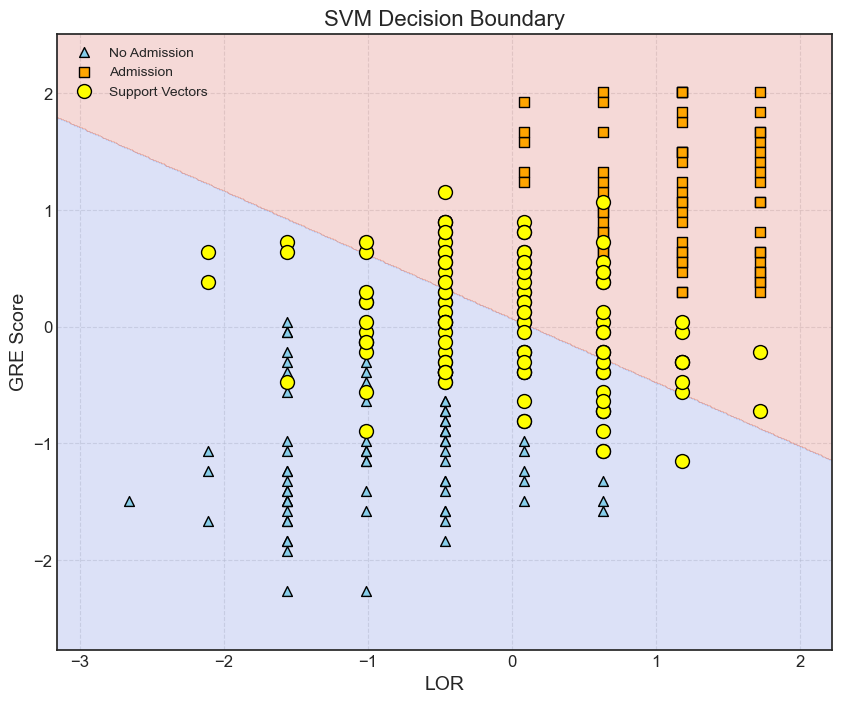

Number of support vectors:  117
Plotting for classifier: svm_rbf_X_train4


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


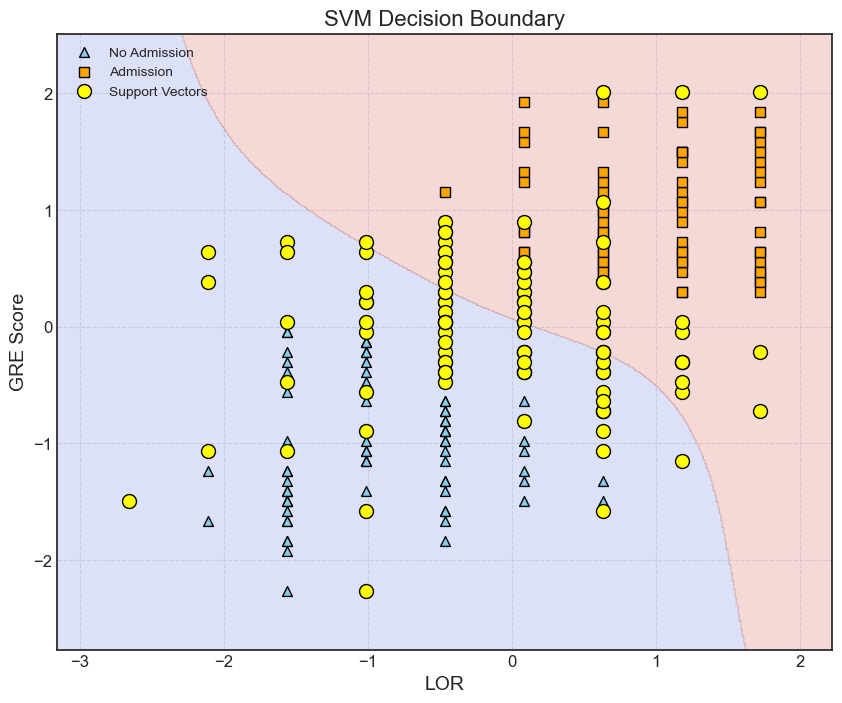

Number of support vectors:  105
Plotting for classifier: svm_poly_X_train4


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


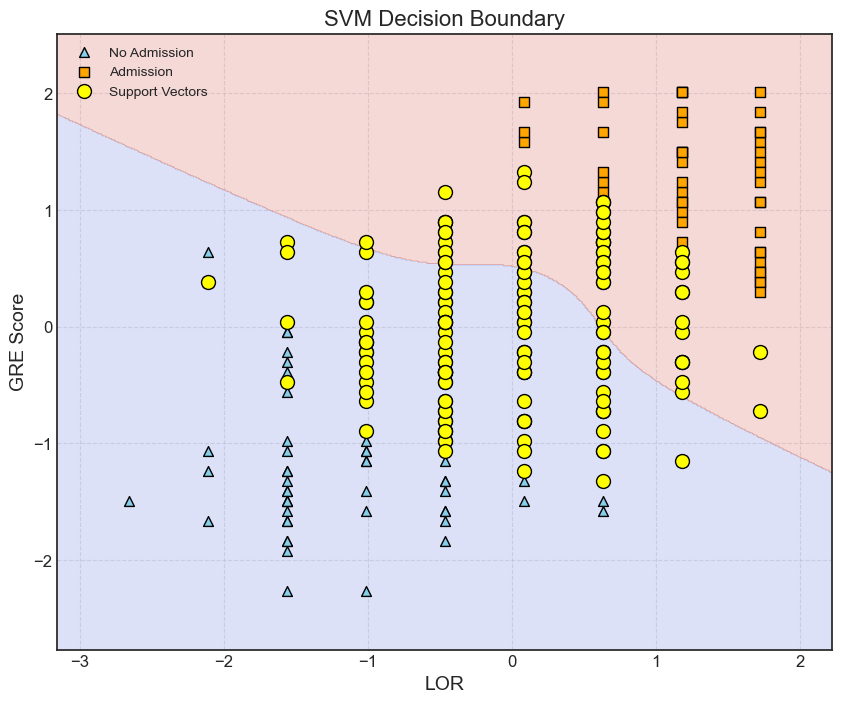

Number of support vectors:  161
Plotting for classifier: svm_sigmoid_X_train4


/Users/nehajoshi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


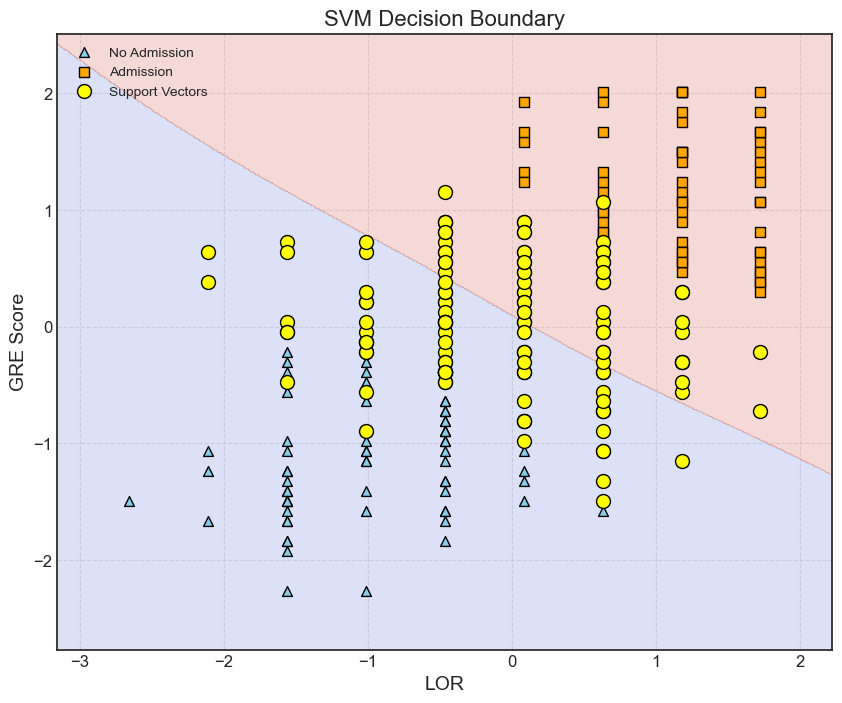

Number of support vectors:  131


In [24]:
# plot data and decision boundries for all 16 combinations

for classifier_name, classifier in trained_classifiers.items():
    print("Plotting for classifier:", classifier_name)
    plot_svc(classifier, X_train, y_train, feature_names[classifier_name])

In [25]:
# visually Best: RBF X4_train (LOR and GRE score)

In [26]:
# Get test data
test_data = pd.read_csv('data_test-2.csv')
test_data.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0,328,295,101,2,2.5,2.0,7.86,0
1,1,325,315,104,3,3.0,2.5,8.33,0
2,2,191,324,111,5,4.5,4.0,9.16,1
3,3,49,321,110,3,3.5,5.0,8.85,1
4,4,180,307,102,3,3.0,3.0,8.27,0


In [27]:
# standardize testing data
test_data = standardize_dataframe(test_data)
test_data.head()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.710534,0.930242,-2.225397,-1.320530,-1.274118,-1.140532,-1.898521,-1.497349,-1.105542
1,-1.667229,0.905443,-0.292370,-0.779699,-0.254824,-0.570266,-1.290994,-0.626097,-1.105542
2,-1.623925,-0.202208,0.577492,0.482241,1.783765,1.140532,0.531586,0.912498,0.904534
3,-1.580620,-1.375989,0.287538,0.301964,-0.254824,0.000000,1.746640,0.337842,0.904534
4,-1.537315,-0.293135,-1.065581,-1.140253,-0.254824,-0.570266,-0.683468,-0.737320,-1.105542


In [28]:
# extract selected features from test data
X_test = test_data[['CGPA', 'SOP']]
X_test.head()

,CGPA,SOP
0,-1.497349,-1.140532
1,-0.626097,-0.570266
2,0.912498,1.140532
3,0.337842,0.000000
4,-0.737320,-0.570266


In [29]:
# Best Model is Linear model with CPGA and SOP as the features

best_model = SVC(kernel='linear', C=0.1)

best_model.fit(X1_train, y_train)

# make predictions
y_pred = best_model.predict(X_test)

In [30]:
print(y_pred.shape)
print(y_pred.sum())

(80,)
38


In [31]:
y_pred = pd.DataFrame(y_pred, columns = ['preds'])

In [32]:
y_pred

,preds
0,0
1,0
2,1
3,1
4,0
...,...
75,0
76,0
77,0
78,0


In [33]:
#save to csv

y_pred.to_csv('Neha_Joshi_Preds.csv')

In [34]:
# EOF